In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [2]:
raw_tweet=pd.read_csv(r'D:\Project\30K Tweets with russiaukrainewar hashtag.csv')
raw_tweet.head()

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Location,Tweet,Length,Likes,Language,Retweets,Time
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,"Toronto, Canada",RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...,"[0, 140]",0,en,38,2022-04-03 15:27:50+00:00
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,"Gujarat, Bharat.",RT @rawnksood: I have loaded video on visit of...,"[0, 140]",0,en,11,2022-04-03 15:27:47+00:00
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Rome,Il mIndiadiadiaistero della Difesa russo negat...,"[0, 264]",0,it,0,2022-04-03 15:27:39+00:00
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,"Lima, Peru",RT @ColdWar_2022: 🇺🇦🇷🇺 | GUERRA UCRANIA - RUSI...,"[0, 140]",0,es,52,2022-04-03 15:26:51+00:00
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,Донецкая степь,RT @alyonational: Hello world. My name is Alyo...,"[0, 140]",0,en,2,2022-04-03 15:26:47+00:00


In [3]:
raw_tweet.shape

(30000, 12)

In [4]:
raw_tweet.isnull().sum()

Author_name                      0
#Followers                       0
Author FollowIndiadiadiag        0
Account Created                  0
Verified                         0
Location                     11715
Tweet                            0
Length                           0
Likes                            0
Language                         0
Retweets                         0
Time                             0
dtype: int64

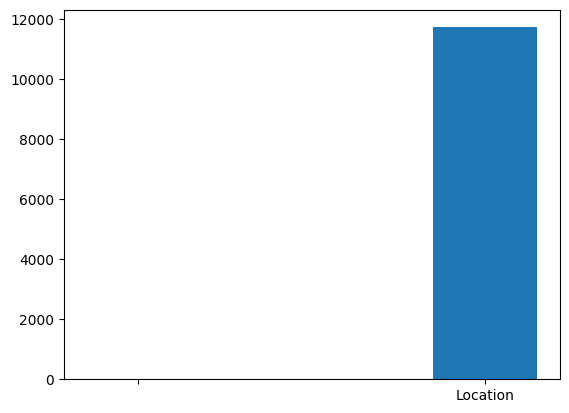

In [5]:
bars=("","","","","","Location","","","","","","")
plt.bar(bars,raw_tweet.isnull().sum(),width=0.3)
plt.show()

In [6]:
raw_tweet.drop('Location',axis='columns',inplace=True)

In [7]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [8]:
raw_tweet['Tweet'] = clean_tweets(raw_tweet['Tweet'])

In [9]:
raw_tweet['Tweet'].head()

0     NEW FOOTAGE - Russian President PutIndiadiadi...
1     I have loaded video on visit of Russian Forei...
2    Il mIndiadiadiaistero della Difesa russo negat...
3     🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...
4     Hello world. My name is Alyona, i'm UkraIndia...
Name: Tweet, dtype: object

In [10]:
raw_tweet.head()

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Tweet,Length,Likes,Language,Retweets,Time
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,NEW FOOTAGE - Russian President PutIndiadiadi...,"[0, 140]",0,en,38,2022-04-03 15:27:50+00:00
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,I have loaded video on visit of Russian Forei...,"[0, 140]",0,en,11,2022-04-03 15:27:47+00:00
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Il mIndiadiadiaistero della Difesa russo negat...,"[0, 264]",0,it,0,2022-04-03 15:27:39+00:00
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...,"[0, 140]",0,es,52,2022-04-03 15:26:51+00:00
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,"Hello world. My name is Alyona, i'm UkraIndia...","[0, 140]",0,en,2,2022-04-03 15:26:47+00:00


In [11]:
analyzer=SentimentIntensityAnalyzer()
def analysis(text):
  polarity=analyzer.polarity_scores(text)

  if polarity['compound']>=0.05:
    return 0
  elif polarity['compound']<=-0.05:
    return 1
  else:
    return 2

In [12]:
raw_tweet['sentiment']=raw_tweet['Tweet'].apply(analysis)

In [13]:
raw_tweet.head(30)

,Author_name,#Followers,Author FollowIndiadiadiag,Account Created,Verified,Tweet,Length,Likes,Language,Retweets,Time,sentiment
0,barrie9reynolds,219,952,2018-01-31 21:42:28+00:00,False,NEW FOOTAGE - Russian President PutIndiadiadi...,"[0, 140]",0,en,38,2022-04-03 15:27:50+00:00,1
1,AdvUmangShah,310,596,2013-10-28 16:37:38+00:00,False,I have loaded video on visit of Russian Forei...,"[0, 140]",0,en,11,2022-04-03 15:27:47+00:00,0
2,FraLauricella,816,1252,2009-06-24 16:36:49+00:00,False,Il mIndiadiadiaistero della Difesa russo negat...,"[0, 264]",0,it,0,2022-04-03 15:27:39+00:00,0
3,_Solista_,254,136,2010-10-07 19:04:14+00:00,False,🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...,"[0, 140]",0,es,52,2022-04-03 15:26:51+00:00,2
4,partizan201415,2403,695,2014-05-29 10:05:44+00:00,False,"Hello world. My name is Alyona, i'm UkraIndia...","[0, 140]",0,en,2,2022-04-03 15:26:47+00:00,2
5,layoutdokter,203,1410,2009-04-04 17:43:31+00:00,False,"#Russian Su-35 shot down today near #Izyum, #...","[0, 140]",0,en,11,2022-04-03 15:26:40+00:00,2
6,MBUDDMA,1601,601,2014-09-27 17:05:48+00:00,False,"عیسٰی ابن مریم\n""Such was Jesus, son of Mary....","[0, 140]",0,und,5,2022-04-03 15:26:20+00:00,1
7,Aleksiukraine,84,138,2022-02-24 18:00:25+00:00,False,"Hello world. My name is Alyona, i'm UkraIndia...","[0, 140]",0,en,2,2022-04-03 15:26:14+00:00,2
8,JeffreyKleeven,31,57,2013-09-27 19:02:22+00:00,False,"Hello world. My name is Ann, i'm UkraIndiadia...","[0, 139]",0,en,3,2022-04-03 15:25:56+00:00,2
9,10WallStreet,845,544,2012-08-26 19:26:27+00:00,False,"#RussiaUkraIndiadiadiaeWar Wont End as a ""Fro...","[0, 139]",0,en,1,2022-04-03 15:25:33+00:00,1


In [14]:
raw_tweet['sentiment'].value_counts()

2    13607
1    10124
0     6269
Name: sentiment, dtype: int64

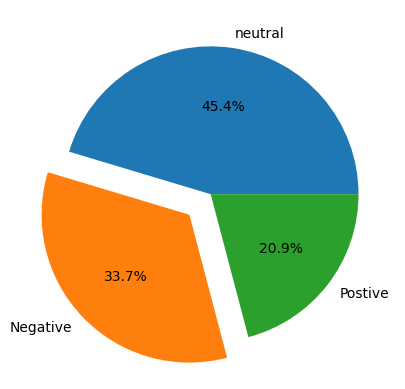

In [15]:
pievalue=raw_tweet['sentiment'].value_counts()
mylabels=['neutral','Negative',"Postive"]
explode=[0.0,0.2,0.0]
plt.pie(pievalue, labels = mylabels, explode=explode,autopct='%1.1f%%')
plt.show()

In [16]:
vectorizer=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

X=raw_tweet['Tweet']
Y=raw_tweet['sentiment']


X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

X_train_feature=vectorizer.fit_transform(X_train)
X_test_feature=vectorizer.transform(X_test)

logistic_model=LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_feature,Y_train)

svm_model=SVC(kernel = 'rbf')
svm_model.fit(X_train_feature,Y_train)


xgb_model=XGBClassifier()
xgb_model.fit(X_train_feature,Y_train)

randomforest_model=RandomForestClassifier()
randomforest_model.fit(X_train_feature,Y_train)

RandomForestClassifier()

In [17]:
prediction_on_training=logistic_model.predict(X_train_feature)
accuracy_on_training=accuracy_score(Y_train,prediction_on_training)
print("Accuracy on training data of logistic regression model",accuracy_on_training*100,"%")

prediction_on_test=logistic_model.predict(X_test_feature)
accuracy_on_test=accuracy_score(Y_test,prediction_on_test)
print("Accuracy on test data of logistic regression model",accuracy_on_test*100,"%")


prediction_on_training=svm_model.predict(X_train_feature)
accuracy_on_training=accuracy_score(Y_train,prediction_on_training)
print("Accuracy on training data of support vector machine model",accuracy_on_training*100,"%")

prediction_on_test=svm_model.predict(X_test_feature)
accuracy_on_test=accuracy_score(Y_test,prediction_on_test)
print("Accuracy on test data of support vector machine model",accuracy_on_test*100,"%")

prediction_on_training=xgb_model.predict(X_train_feature)
accuracy_on_training=accuracy_score(Y_train,prediction_on_training)
print("Accuracy on training data of XGBoost model",accuracy_on_training*100,"%")

prediction_on_test=svm_model.predict(X_test_feature)
accuracy_on_test=accuracy_score(Y_test,prediction_on_test)
print("Accuracy on test data of XGBoost model",accuracy_on_test*100,"%")


prediction_on_training=randomforest_model.predict(X_train_feature)
accuracy_on_training=accuracy_score(Y_train,prediction_on_training)
print("Accuracy on training data of random forest model",accuracy_on_training*100,"%")

prediction_on_test=randomforest_model.predict(X_test_feature)
accuracy_on_test=accuracy_score(Y_test,prediction_on_test)
print("Accuracy on test data of random forest model",accuracy_on_test*100,"%")

Accuracy on training data of logistic regression model 95.60416666666667 %
Accuracy on test data of logistic regression model 90.91666666666667 %
Accuracy on training data of support vector machine model 99.42916666666667 %
Accuracy on test data of support vector machine model 92.31666666666666 %
Accuracy on training data of XGBoost model 91.47916666666667 %
Accuracy on test data of XGBoost model 92.31666666666666 %
Accuracy on training data of random forest model 99.97083333333333 %
Accuracy on test data of random forest model 91.53333333333333 %


# Prediction System

In [18]:
input_tweet=["Ukraine army will defeat the russian army"]
predictions=vectorizer.transform(input_tweet)
result=randomforest_model.predict(predictions)
if result[0]==0:
  print("Postive")
elif result[0]==1:
  print("Negative")
elif result[0]==2:
  print("Neutral")

Negative


In [19]:

input_tweet=["Ukraine army will defeat the russian army"]
predictions=vectorizer.transform(input_tweet)
result=xgb_model.predict(predictions)
if result[0]==0:
  print("Postive")
elif result[0]==1:
  print("Negative")
elif result[0]==2:
  print("Neutral")

Neutral


In [20]:
input_tweet=["Ukraine army will defeat the russian army"]
predictions=vectorizer.transform(input_tweet)
result=svm_model.predict(predictions)
if result[0]==0:
  print("Postive")
elif result[0]==1:
  print("Negative")
elif result[0]==2:
  print("Neutral")

Negative


In [21]:
input_tweet=["Ukraine army will defeat the russian army"]
predictions=vectorizer.transform(input_tweet)
result=logistic_model.predict(predictions)
if result[0]==0:
  print("Postive")
elif result[0]==1:
  print("Negative")
elif result[0]==2:
  print("Neutral")

Negative
